jkNOTE : クレジットビューロー（credit bureau)とはクレジットビューロー（credit bureau)は個人信用情報機関のことです
http://casyingfinance1.seesaa.net/article/62578746.html

<a id="top"></a>
- [Overview](#overview)
- [SK_ID_CURR](#sk-id-curr)
- [SK_ID_BUREAU](#sk-id-bureau)
- [CREDIT_ACTIVE](#credit-active)
- [CREDIT_CURRENCY](#credit-currency)
- [DAYS_CREDIT](#days-credit)
- [CREDIT_DAY_OVERDUE](#credit-day-overdue)
- [DAYS_CREDIT_ENDDATE](#days-credit-enddate)
- [DAYS_ENDDATE_FACT](#days-enddate-fact)
- [AMT_CREDIT_MAX_OVERDUE](#amt-credit-max-overdue)
- [CNT_CREDIT_PROLONG](#cnt-credit-prolong)
- [AMT_CREDIT_SUM](#amt-credit-sum)
- [AMT_CREDIT_SUM_DEBT](#amt-credit-sum-debt)
- [AMT_CREDIT_SUM_LIMIT](#amt-credit-sum-limit)
- [AMT_CREDIT_SUM_OVERDUE](#amt-credit-sum-overdue)
- [CREDIT_TYPE](#credit-type)
- [DAYS_CREDIT_UPDATE](#days-credit-update)
- [AMT_ANNUITY](#amt-annuity)

## Prepare

In [1]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999

bur = feather.read_dataframe('../input/bureau.feather')
Gapp_trn = feather.read_dataframe('../input/application_train.feather')

In [2]:
def target_bar(df, col, title=None):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    t0 = df0[col].value_counts().rename(col + '0')
    t1 = df1[col].value_counts().rename(col + '1')
    t = pd.concat([t0, t1], axis=1).fillna(0).astype(int)
    t['total'] = t.sum(axis=1)
    t.sort_values('total', inplace=True, ascending=False)
    t.drop(columns=['total'], inplace=True)

    idx = np.arange(len(t))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    p1 = ax.bar(idx, t[col + '0'], width)
    p2 = ax.bar(idx+width, t[col + '1'], width)
    ax.legend((p1[0], p2[0]), ('Target=0', 'Target=1'))
    ax.set_title(title)
    ax.set_xticks(idx + width / 2)
    ax.set_xticklabels(t.index.values, rotation=45)

    plt.show()
    
def target_hist(df, col, title):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(df0[col].dropna(), ax=axes[0], color='b')
    axes[0].set_title('Target=0')
    sns.distplot(df1[col].dropna(), ax=axes[1], color='orange')
    axes[1].set_title('Target=1')
    fig.suptitle(title)
    plt.show()

<a id='overview'></a>
## Overview

In [3]:
bur.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
bur.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                1716428 non-null int64
SK_ID_BUREAU              1716428 non-null int64
CREDIT_ACTIVE             1716428 non-null object
CREDIT_CURRENCY           1716428 non-null object
DAYS_CREDIT               1716428 non-null int64
CREDIT_DAY_OVERDUE        1716428 non-null int64
DAYS_CREDIT_ENDDATE       1610875 non-null float64
DAYS_ENDDATE_FACT         1082775 non-null float64
AMT_CREDIT_MAX_OVERDUE    591940 non-null float64
CNT_CREDIT_PROLONG        1716428 non-null int64
AMT_CREDIT_SUM            1716415 non-null float64
AMT_CREDIT_SUM_DEBT       1458759 non-null float64
AMT_CREDIT_SUM_LIMIT      1124648 non-null float64
AMT_CREDIT_SUM_OVERDUE    1716428 non-null float64
CREDIT_TYPE               1716428 non-null object
DAYS_CREDIT_UPDATE        1716428 non-null int64
AMT_ANNUITY               489637 non-null float64
dtypes: float64(8), int64(6), object(

In [1]:
bur.notnull().sum(axis=0) / len(bur)

NameError: name 'bur' is not defined

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="sk-id-curr"></a>
## SK_ID_CURR

In [6]:
bur_cnt_sk_id_curr = bur.groupby('SK_ID_CURR').size().rename('BUR_CNT_SK_ID_CURR').reset_index()
app_trn = app_trn.merge(bur_cnt_sk_id_curr, on="SK_ID_CURR", how="left")

In [7]:
app_trn.BUR_CNT_SK_ID_CURR.notnull().sum() / len(app_trn)

0.8568506492450677

85%くらいのSK_ID_CURRがbureauのデータに入っている

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


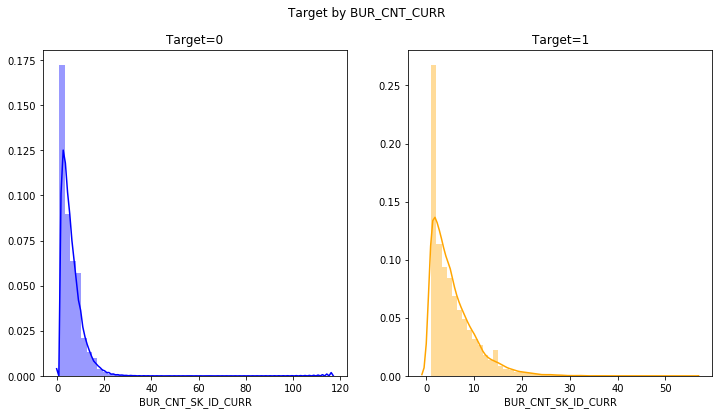

In [8]:
target_hist(app_trn, "BUR_CNT_SK_ID_CURR", "Target by BUR_CNT_CURR")

やっぱ若干Target=1になりがちな人のほうが"bureau"にログが入っているっぽい

<a id="sk-id-bureau"></a>
## SK_ID_BUREAU
Description : Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)

関連ローンのクレジットビューロー情報、ユニークID

0から始まらないことは気になる部分

In [9]:
bur.SK_ID_BUREAU.describe()

count    1.716428e+06
mean     5.924434e+06
std      5.322657e+05
min      5.000000e+06
25%      5.463954e+06
50%      5.926304e+06
75%      6.385681e+06
max      6.843457e+06
Name: SK_ID_BUREAU, dtype: float64

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="credit-active"></a>
## CREDIT_ACTIVE
Description : Status of the Credit Bureau (CB) reported credits

bureauのSTAUTSをone-hot encodingして"SK_ID_CURR"ごとに合計、ターゲット別に合計値の分布を見る

In [10]:
bur_credit_active_dummie = pd.get_dummies(bur.CREDIT_ACTIVE)
dummie_cols =  ["BUR_CREDIT_ACTIVE_" + col.replace(' ', '_') for col in bur_credit_active_dummie.columns]
bur_credit_active_dummie.columns = dummie_cols
bur = pd.concat([bur, bur_credit_active_dummie], axis=1)

In [11]:
BUR_CNT_CREDIE_ACTIVE_DUMMIE = bur.groupby("SK_ID_CURR")[dummie_cols].sum().reset_index()
app_trn = app_trn.merge(BUR_CNT_CREDIE_ACTIVE_DUMMIE, on="SK_ID_CURR", how="left")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


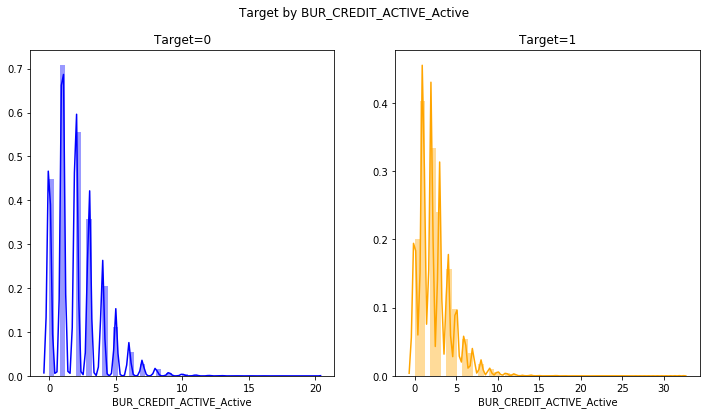

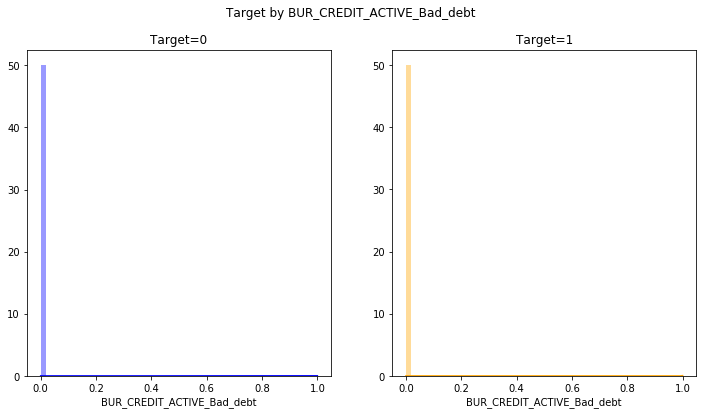

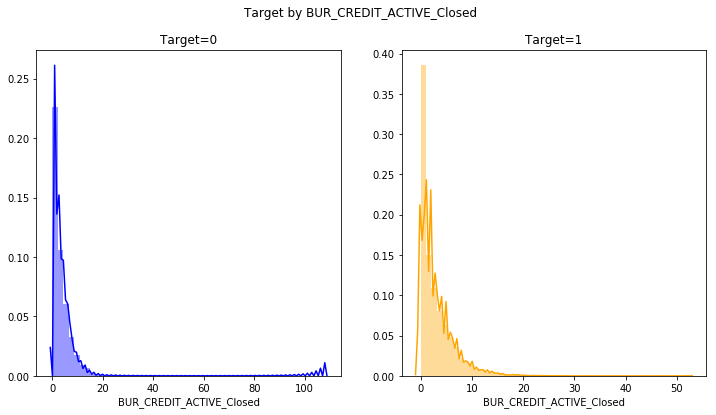

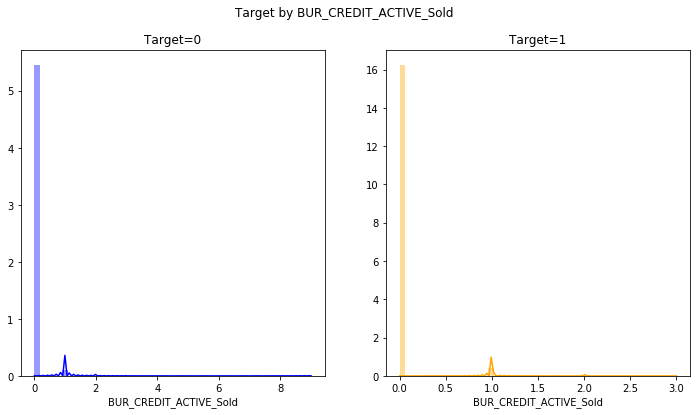

In [12]:
for dum_col in dummie_cols:
    target_hist(app_trn, dum_col, "Target by " + dum_col)

Target = 1の方がBUR_CREDIT_ACTIVE = Closedのステータスの分布が右によっている、多分Target = 1の方がクレジット情報多いから

各値を"SK_ID_CURR"毎のログ数で割って割合にしてみる

In [13]:
BUR_CNT_CREDIE_ACTIVE_DUMMIE = pd.concat([bur.groupby("SK_ID_CURR")[dummie_cols].sum(),
                                          bur.groupby("SK_ID_CURR").size().rename("CNT_SK_ID_CURR")], axis=1)
# BUR_CNT_CREDIE_ACTIVE_DUMMIE[dummie_cols] / BUR_CNT_CREDIE_ACTIVE_DUMMIE.CNT_SK_ID_CURR

RATIO_BUR_CNT_CREDIT_ACTIVE_DUMMIE = pd.DataFrame()
for col in dummie_cols:
    RATIO_BUR_CNT_CREDIT_ACTIVE_DUMMIE = pd.concat([RATIO_BUR_CNT_CREDIT_ACTIVE_DUMMIE,
                                                    (BUR_CNT_CREDIE_ACTIVE_DUMMIE[col] / BUR_CNT_CREDIE_ACTIVE_DUMMIE.CNT_SK_ID_CURR).rename("RATIO_" + col)], axis=1)
RATIO_BUR_CNT_CREDIT_ACTIVE_DUMMIE.reset_index(inplace=True)
RATIO_BUR_CNT_CREDIT_ACTIVE_DUMMIE.head()

,SK_ID_CURR,RATIO_BUR_CREDIT_ACTIVE_Active,RATIO_BUR_CREDIT_ACTIVE_Bad_debt,RATIO_BUR_CREDIT_ACTIVE_Closed,RATIO_BUR_CREDIT_ACTIVE_Sold
0,100001,0.428571,0.0,0.571429,0.0
1,100002,0.250000,0.0,0.750000,0.0
2,100003,0.250000,0.0,0.750000,0.0
3,100004,0.000000,0.0,1.000000,0.0
4,100005,0.666667,0.0,0.333333,0.0


c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


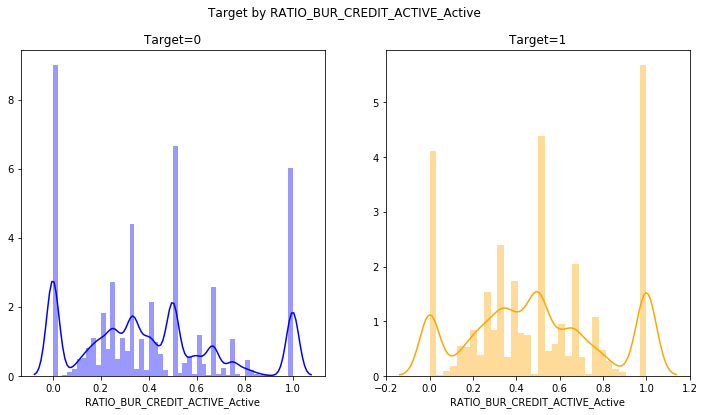

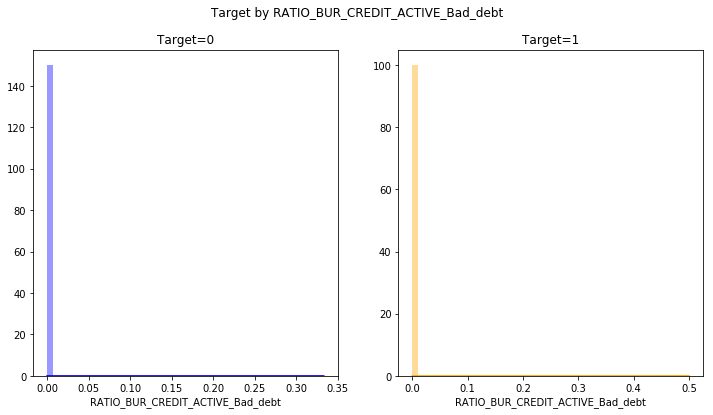

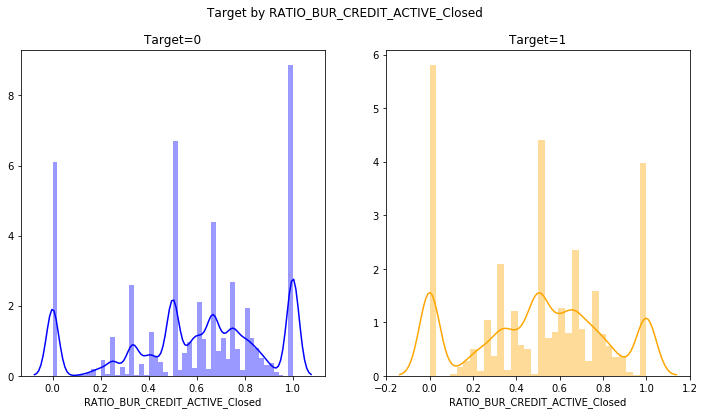

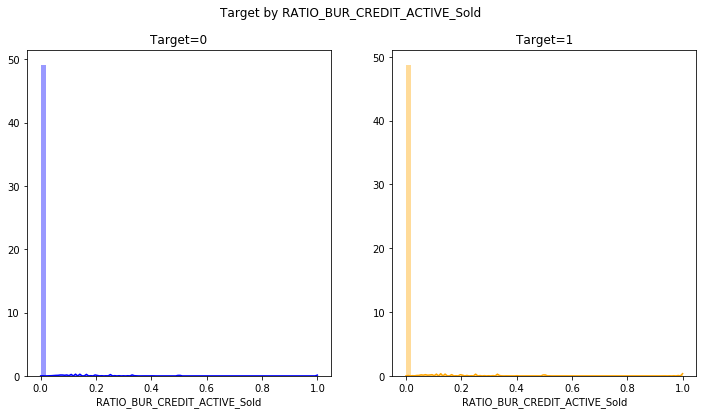

In [14]:
app_trn = app_trn.merge(RATIO_BUR_CNT_CREDIT_ACTIVE_DUMMIE, on="SK_ID_CURR", how="left")
for dum_col in dummie_cols:
    c = "RATIO_" + dum_col
    target_hist(app_trn, c, "Target by " + c)

割ったほうが良さそうな気がする、特にActiveのステータスが多いほどTarget=1になっている様に見えるしClosedのステータスが多いほどTarget=0になっているような気がする

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="credit-currency"></a>
## CREDIT_CURRENCY
description : Recoded currency of the Credit Bureau credit

"CREDIT_CURRENCY"の出現数

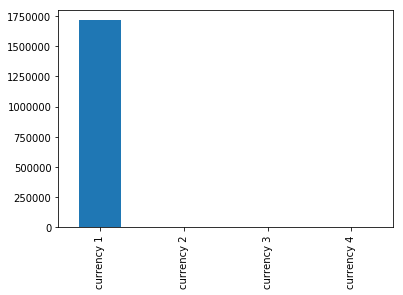

In [15]:
bur.CREDIT_CURRENCY.value_counts().plot.bar()

In [16]:
bur.CREDIT_CURRENCY.value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

CREDIT_CURRENCYは1~4があって、ほぼ"currency 1"

"SK_ID_CURR"ごとに使用しているユニークな"CREDIT_CURRENCY"の数を確認する

In [17]:
bur.groupby('SK_ID_CURR').CREDIT_CURRENCY.nunique().value_counts()

1    304739
2      1045
3        27
Name: CREDIT_CURRENCY, dtype: int64

多くの"SK_ID_CURR"が1つの"CREDIT_CURRENCY"を使用している

以下切り口が考えられる
- 各currencyのtarget=0/1
- currencyの使用数毎のtarget=0/1ヒスト

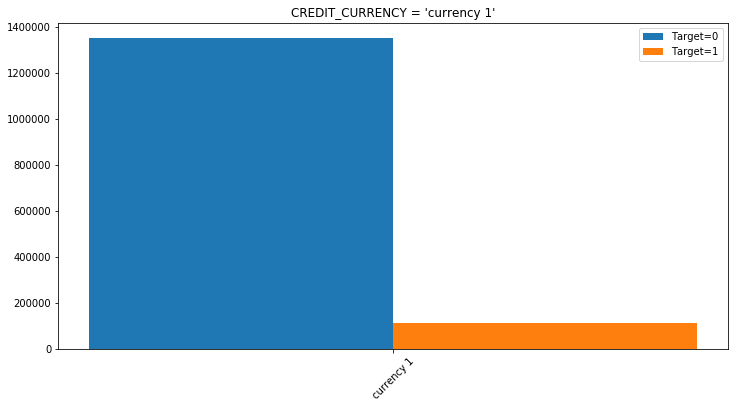

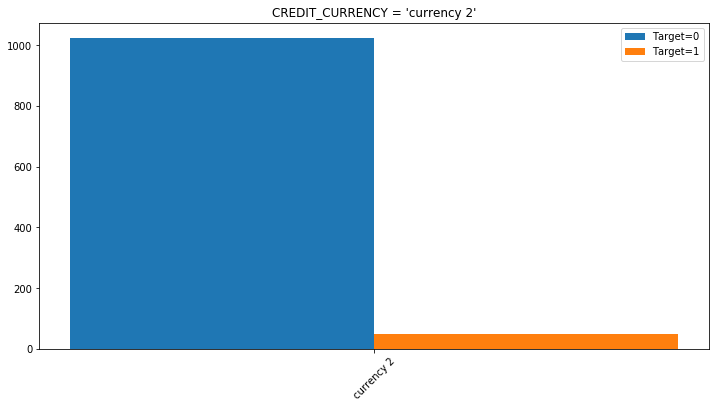

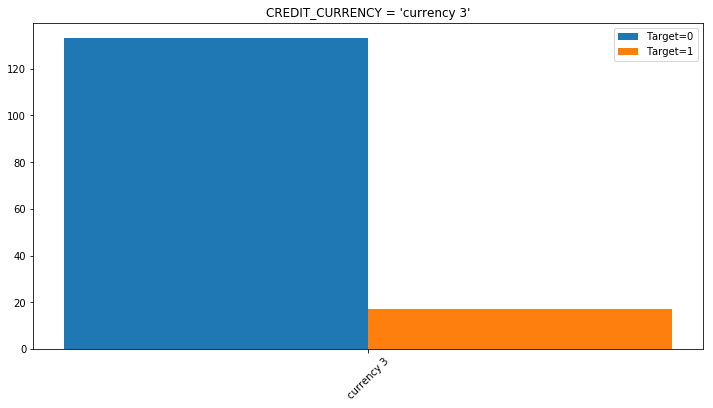

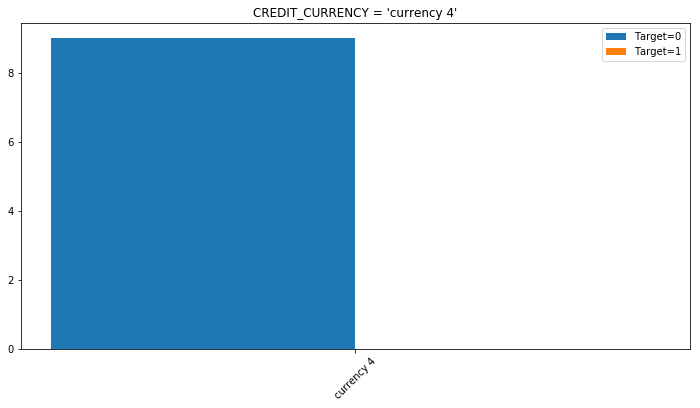

In [18]:
# - 各currencyのtarget=0/1
credit_currency = bur[['SK_ID_CURR', 'CREDIT_CURRENCY']].copy()
credit_currency = credit_currency.merge(app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR')

for i in range(1, 5):
    target_bar(credit_currency[credit_currency.CREDIT_CURRENCY == "currency {}".format(i)],
                    col="CREDIT_CURRENCY", title="CREDIT_CURRENCY = 'currency {}'".format(i))


currency 1, 3がTarget=1の割合が高そう, currency 4はサンプル数少ないけどTarget=1なし

In [19]:
# - currencyの使用数毎のtarget=0/1ヒスト
credit_currency_dummie = pd.get_dummies(bur.CREDIT_CURRENCY)
dum_cols =  ["CREDIT_CURRENCY_" + c.replace(" ", "") for c in credit_currency_dummie.columns]
credit_currency_dummie.columns = dum_cols
credit_currency_dummie = pd.concat([bur.SK_ID_CURR, credit_currency_dummie], axis=1)
credit_currency_dummie_sum = credit_currency_dummie.groupby('SK_ID_CURR')[dum_cols].sum().reset_index()
credit_currency_dummie_sum = credit_currency_dummie_sum.merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
credit_currency_dummie_sum.head()

,SK_ID_CURR,CREDIT_CURRENCY_currency1,CREDIT_CURRENCY_currency2,CREDIT_CURRENCY_currency3,CREDIT_CURRENCY_currency4,TARGET
0,100002,8,0,0,0,1
1,100003,4,0,0,0,0
2,100004,2,0,0,0,0
3,100007,1,0,0,0,0
4,100008,3,0,0,0,0


c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


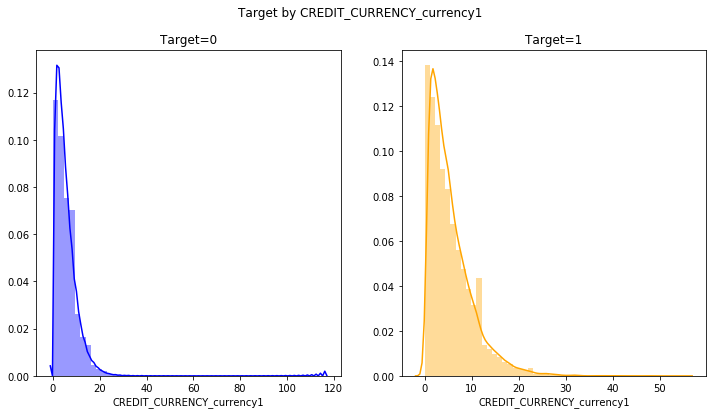

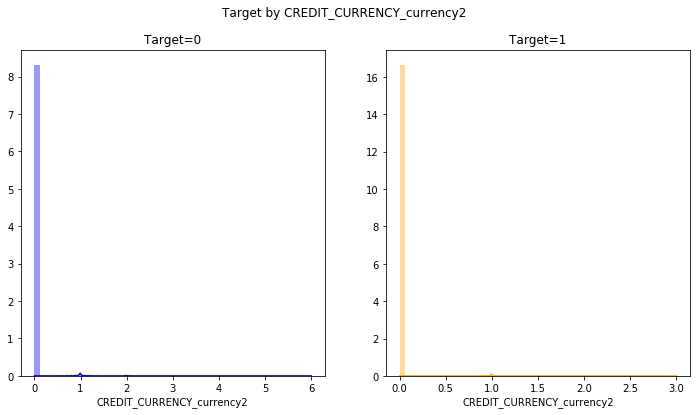

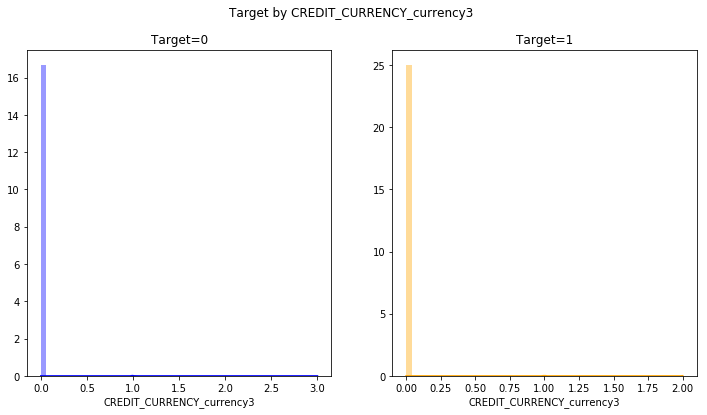

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


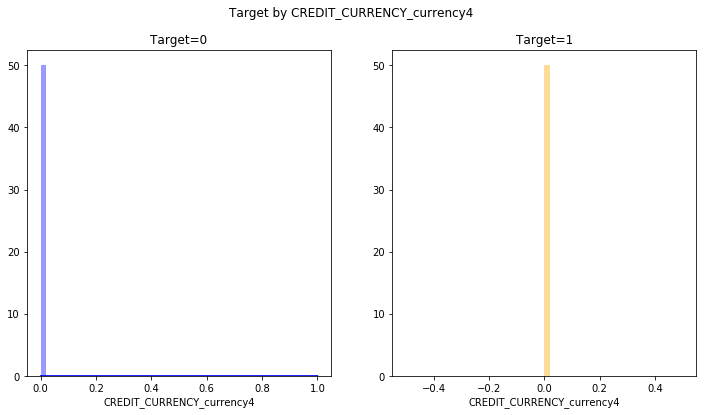

In [20]:
for dum_col in dum_cols:
    target_hist(credit_currency_dummie_sum, dum_col, "Target by " + dum_col)

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="days-credit"></a>
## DAYS_CREDIT
description : How many days before current application did client apply for Credit Bureau credit


現在のアプリケーションがクレジットビューローのクレジットに適用された日数？？？

In [21]:
days_credit = bur[['SK_ID_CURR', 'DAYS_CREDIT']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


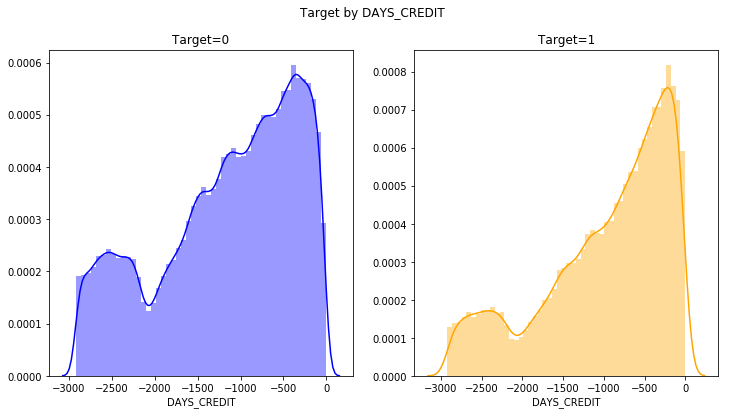

In [22]:
target_hist(days_credit, 'DAYS_CREDIT', "Target by DAYS_CREDIT")

多分2900くらいで上限がある

In [23]:
bur.DAYS_CREDIT.describe()

count    1.716428e+06
mean    -1.142108e+03
std      7.951649e+02
min     -2.922000e+03
25%     -1.666000e+03
50%     -9.870000e+02
75%     -4.740000e+02
max      0.000000e+00
Name: DAYS_CREDIT, dtype: float64

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


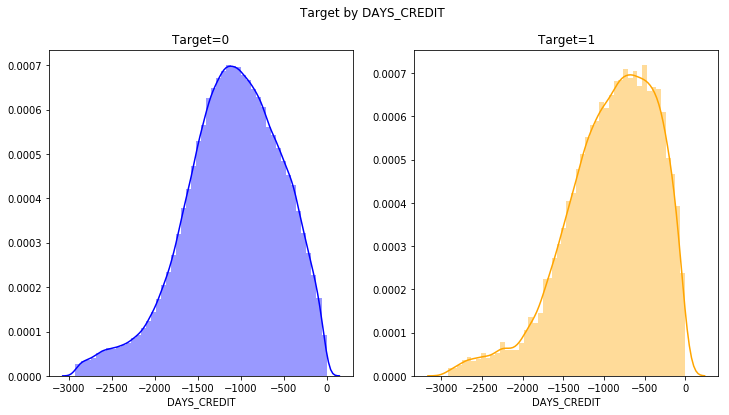

In [24]:
avg_days_credit = bur.groupby('SK_ID_CURR').DAYS_CREDIT.mean().reset_index()
avg_days_credit = avg_days_credit.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
target_hist(avg_days_credit, 'DAYS_CREDIT', "Target by DAYS_CREDIT")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


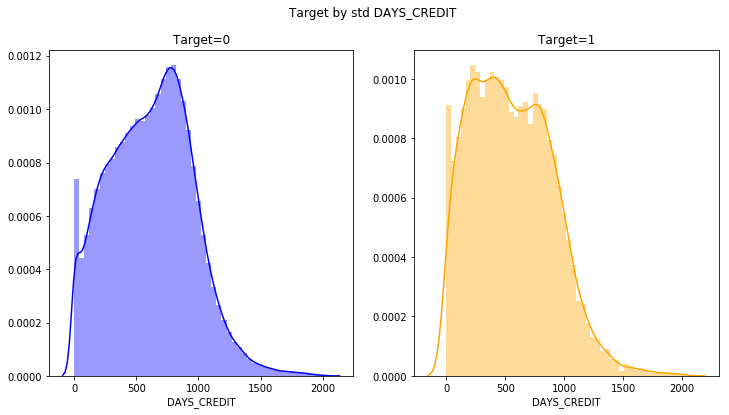

In [25]:
std_days_credit = bur.groupby('SK_ID_CURR').DAYS_CREDIT.std().reset_index()
std_days_credit = std_days_credit.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
target_hist(std_days_credit, 'DAYS_CREDIT', "Target by std DAYS_CREDIT")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


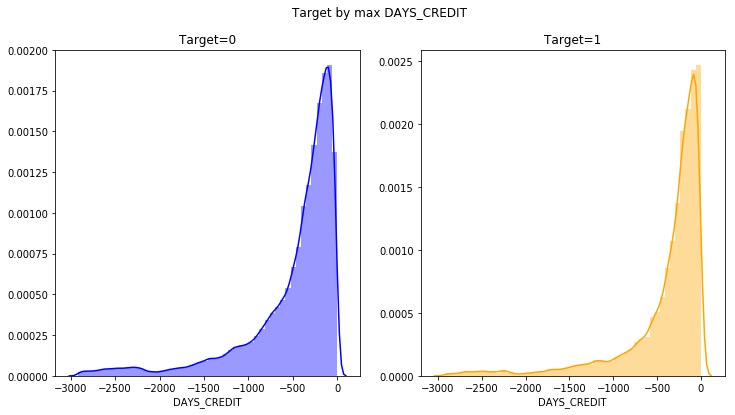

In [26]:
max_days_credit = bur.groupby('SK_ID_CURR').DAYS_CREDIT.max().reset_index()
max_days_credit = max_days_credit.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
target_hist(max_days_credit, 'DAYS_CREDIT', "Target by max DAYS_CREDIT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="credit-day-overdue"></a>
## CREDIT_DAY_OVERDUE

description : Number of days past due on CB(=Credit Bureau) credit at the time of application for related loan in our sample

In [27]:
credit_day_ovredue = bur[['SK_ID_CURR', 'CREDIT_DAY_OVERDUE']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
credit_day_ovredue.CREDIT_DAY_OVERDUE.describe()

count    1.465325e+06
mean     8.887612e-01
std      3.824707e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.792000e+03
Name: CREDIT_DAY_OVERDUE, dtype: float64

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


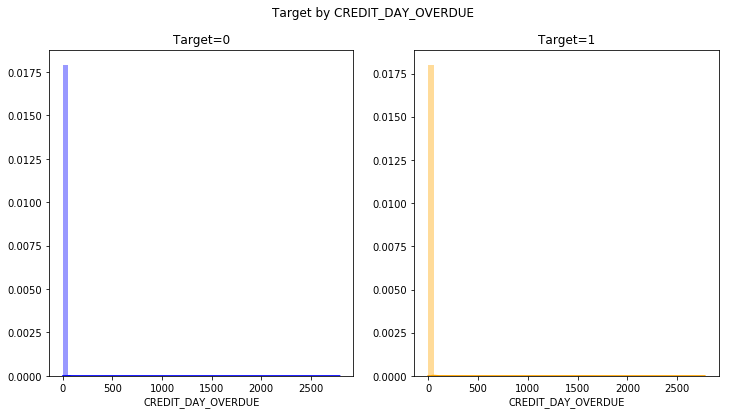

In [28]:
target_hist(credit_day_ovredue, 'CREDIT_DAY_OVERDUE', "Target by CREDIT_DAY_OVERDUE")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


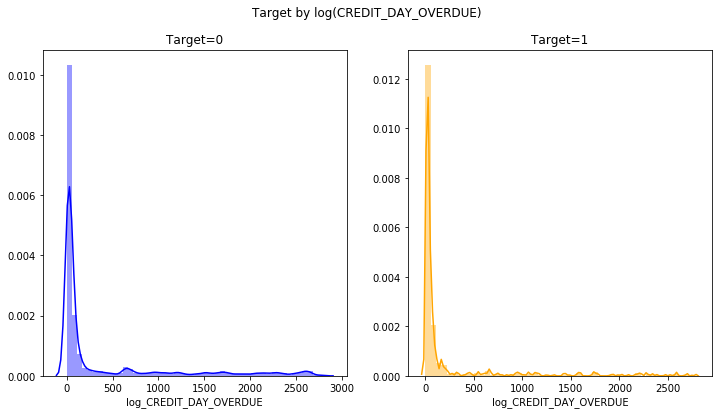

In [29]:
credit_day_ovredue['log_CREDIT_DAY_OVERDUE'] = credit_day_ovredue.CREDIT_DAY_OVERDUE
target_hist(credit_day_ovredue[credit_day_ovredue.CREDIT_DAY_OVERDUE > 0], 'log_CREDIT_DAY_OVERDUE', "Target by log(CREDIT_DAY_OVERDUE)")

In [30]:
bur.CREDIT_DAY_OVERDUE.describe()

count    1.716428e+06
mean     8.181666e-01
std      3.654443e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.792000e+03
Name: CREDIT_DAY_OVERDUE, dtype: float64

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


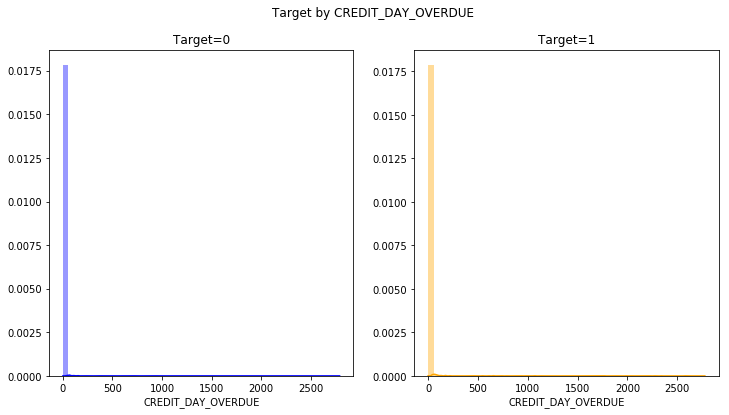

In [31]:
max_credit_day_overdue = bur.groupby('SK_ID_CURR').CREDIT_DAY_OVERDUE.max().reset_index()
max_credit_day_overdue = max_credit_day_overdue.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
target_hist(max_credit_day_overdue, 'CREDIT_DAY_OVERDUE', "Target by CREDIT_DAY_OVERDUE")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


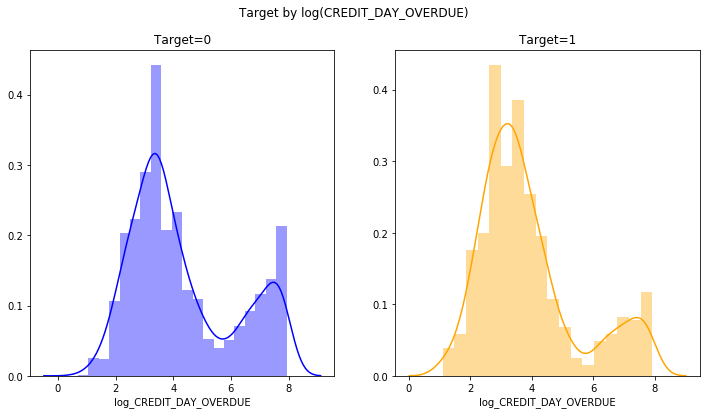

In [32]:
max_credit_day_overdue['log_CREDIT_DAY_OVERDUE'] = np.log(1 + max_credit_day_overdue.CREDIT_DAY_OVERDUE)
target_hist(max_credit_day_overdue[max_credit_day_overdue.CREDIT_DAY_OVERDUE > 0], "log_CREDIT_DAY_OVERDUE", "Target by log(CREDIT_DAY_OVERDUE)")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="days-credit-enddate"></a>
## DAYS_CREDIT_ENDDATE

description : Remaining duration of CB credit (in days) at the time of application in Home Credit

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


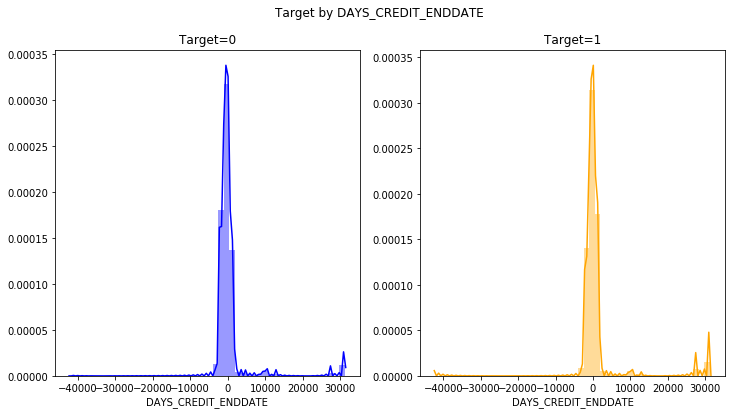

In [33]:
days_credit_enddate = bur[['SK_ID_CURR', 'DAYS_CREDIT_ENDDATE']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
target_hist(days_credit_enddate, 'DAYS_CREDIT_ENDDATE', "Target by DAYS_CREDIT_ENDDATE")

<div style="text-align: right;">
[back to top](#top)
</div>

In [34]:
avg_days_credit_enddate = bur.groupby('SK_ID_CURR').DAYS_CREDIT_ENDDATE.mean().reset_index()
avg_days_credit_enddate  = avg_days_credit_enddate.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


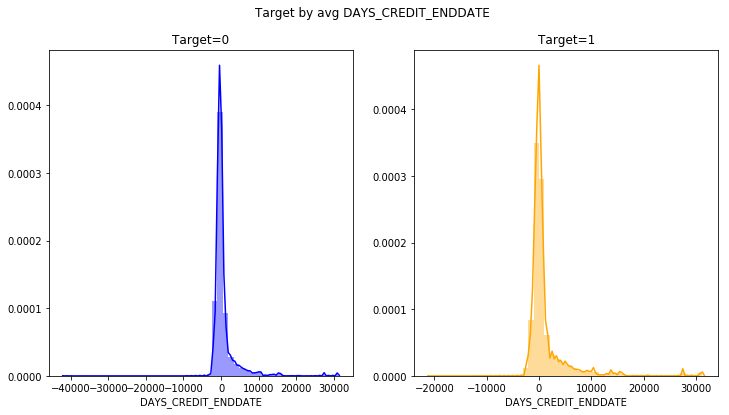

In [35]:
target_hist(avg_days_credit_enddate, 'DAYS_CREDIT_ENDDATE', "Target by avg DAYS_CREDIT_ENDDATE")

<a id="days-enddate-fact"></a>
## DAYS_ENDDATE_FACT

discription : Days since CB credit ended at the time of application in Home Credit (only for closed credit)

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


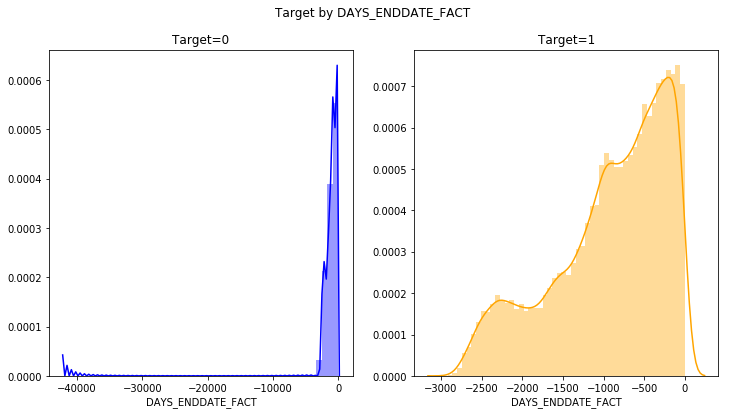

In [36]:
days_enddate_fact = bur[['SK_ID_CURR', 'DAYS_ENDDATE_FACT']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)

target_hist(days_enddate_fact, 'DAYS_ENDDATE_FACT', "Target by DAYS_ENDDATE_FACT")

とりあえずの可視化がすごい差があるように見える

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


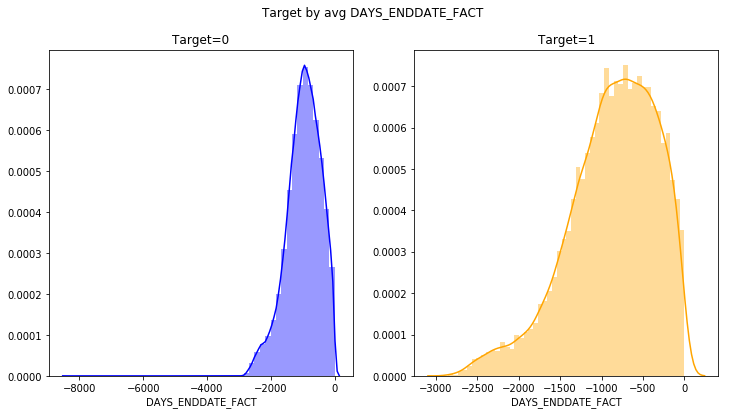

In [37]:
avg_days_enddate_fact = bur.groupby('SK_ID_CURR').DAYS_ENDDATE_FACT.mean().reset_index()
avg_days_enddate_fact  = avg_days_enddate_fact.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
target_hist(avg_days_enddate_fact, 'DAYS_ENDDATE_FACT', "Target by avg DAYS_ENDDATE_FACT")

すごい差がある

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-credit-max-overdue"></a>
## AMT_CREDIT_MAX_OVERDUE

description : Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

In [38]:
bur.AMT_CREDIT_MAX_OVERDUE.describe()

count    5.919400e+05
mean     3.825418e+03
std      2.060316e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.159872e+08
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


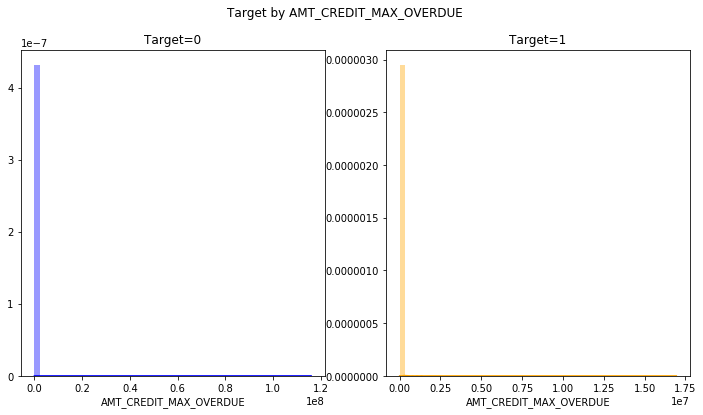

In [39]:
amt_credit_max_overdue = bur[['SK_ID_CURR', 'AMT_CREDIT_MAX_OVERDUE']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)

target_hist(amt_credit_max_overdue, 'AMT_CREDIT_MAX_OVERDUE', "Target by AMT_CREDIT_MAX_OVERDUE")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


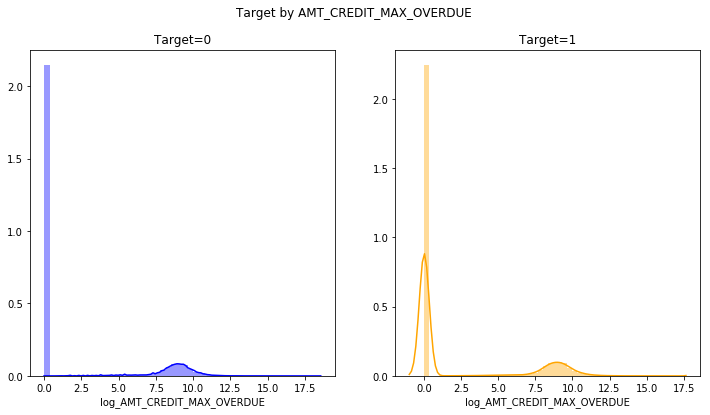

In [40]:
# 対数化してみる
amt_credit_max_overdue['log_AMT_CREDIT_MAX_OVERDUE'] = np.log(amt_credit_max_overdue.AMT_CREDIT_MAX_OVERDUE + 1)
target_hist(amt_credit_max_overdue, 'log_AMT_CREDIT_MAX_OVERDUE', "Target by AMT_CREDIT_MAX_OVERDUE")

MAXの値がめちゃめちゃ大きいから扱いにくい、対数化したらまぁまぁ見えてきそう

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


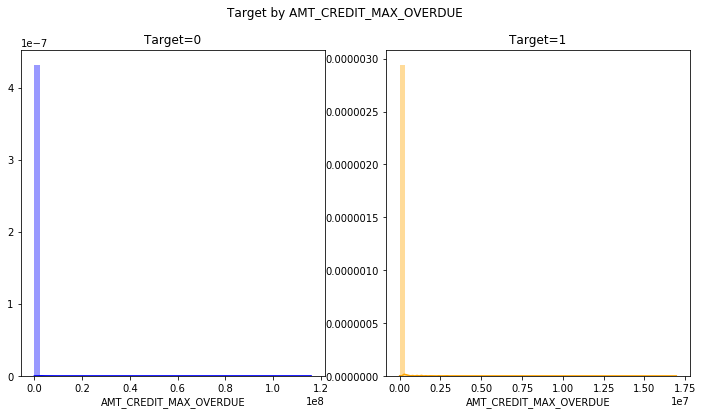

In [41]:
amt_credit_max_overdue = bur[['SK_ID_CURR', 'AMT_CREDIT_MAX_OVERDUE']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)

target_hist(amt_credit_max_overdue[amt_credit_max_overdue.AMT_CREDIT_MAX_OVERDUE > 10]
                , 'AMT_CREDIT_MAX_OVERDUE', "Target by AMT_CREDIT_MAX_OVERDUE")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


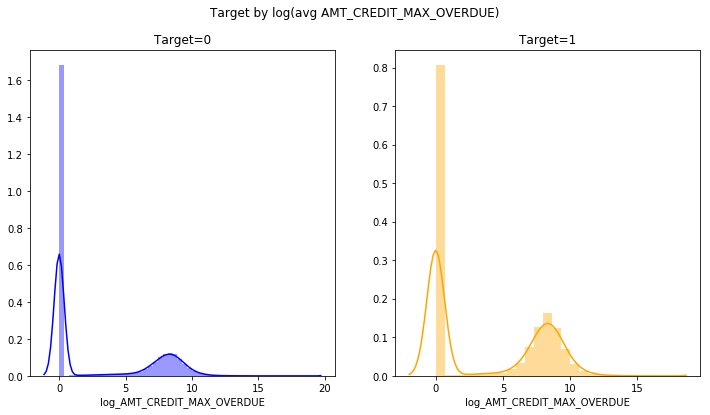

In [42]:
avg_amt_credit_max_overdue = bur.groupby('SK_ID_CURR').AMT_CREDIT_MAX_OVERDUE.mean().reset_index()
avg_amt_credit_max_overdue = avg_amt_credit_max_overdue.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)

avg_amt_credit_max_overdue["log_AMT_CREDIT_MAX_OVERDUE"] = np.log(avg_amt_credit_max_overdue.AMT_CREDIT_MAX_OVERDUE + 1)
target_hist(avg_amt_credit_max_overdue, "log_AMT_CREDIT_MAX_OVERDUE", "Target by log(avg AMT_CREDIT_MAX_OVERDUE)")

MAXの値が大きすぎてきついからlogとったけど正規分布ぽくなって扱いやすそう

lightgbmとかは非線形な手法なので対数化しなくて良いかもだけど

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="cnt-credit-prolong"></a>
## CNT_CREDIT_PROLONG

description : How many times was the Credit Bureau credit prolonged.

借入延長的な？

In [43]:
cnt_credit_prolong = bur[['SK_ID_CURR', 'CNT_CREDIT_PROLONG']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)

print(cnt_credit_prolong.CNT_CREDIT_PROLONG.describe())

# target_hist(amt_credit_max_overdue, 'AMT_CREDIT_MAX_OVERDUE', "Target by AMT_CREDIT_MAX_OVERDUE")

count    1.465325e+06
mean     7.278249e-03
std      1.026408e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: CNT_CREDIT_PROLONG, dtype: float64


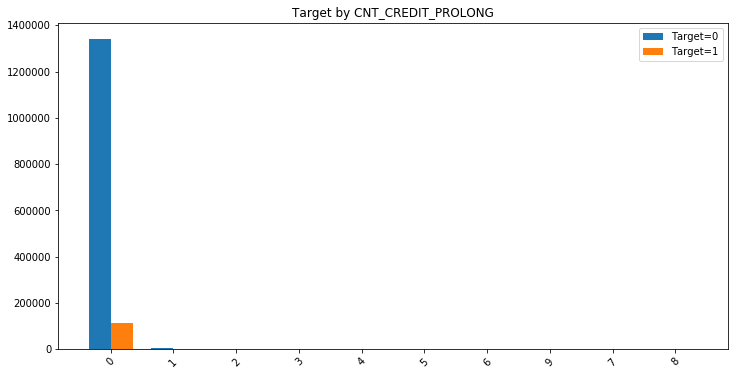

In [44]:
target_bar(cnt_credit_prolong, "CNT_CREDIT_PROLONG", "Target by CNT_CREDIT_PROLONG")

やっぱみんなちゃんとしていて延長はほとんどないみたい、1以上の値にしぼって見てみる

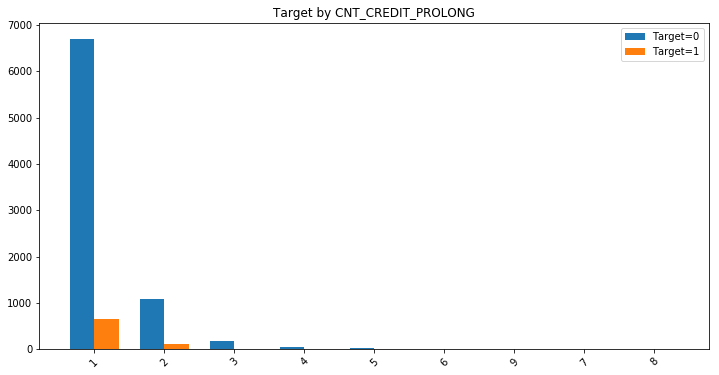

In [45]:
target_bar(cnt_credit_prolong[cnt_credit_prolong.CNT_CREDIT_PROLONG > 0], "CNT_CREDIT_PROLONG", "Target by CNT_CREDIT_PROLONG")

回数が多いからTarget=1になる割合が多いとかないのか？これは1つのログに限って見ているから"SK_ID_CURR"の合計で見てみる

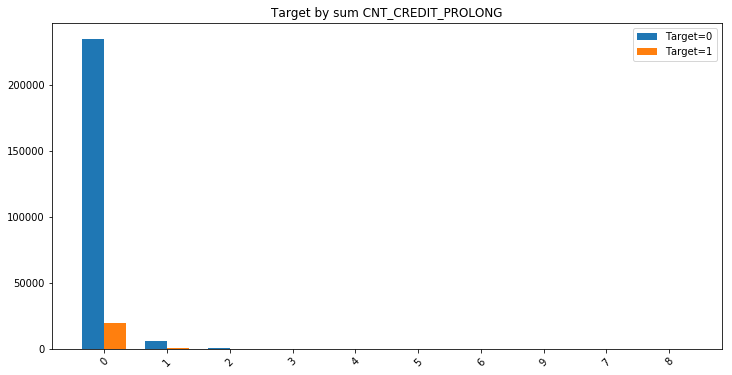

In [46]:
sum_cnt_credit_prolong = bur.groupby('SK_ID_CURR').CNT_CREDIT_PROLONG.sum().reset_index()
sum_cnt_credit_prolong = sum_cnt_credit_prolong.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
target_bar(sum_cnt_credit_prolong, "CNT_CREDIT_PROLONG", "Target by sum CNT_CREDIT_PROLONG")

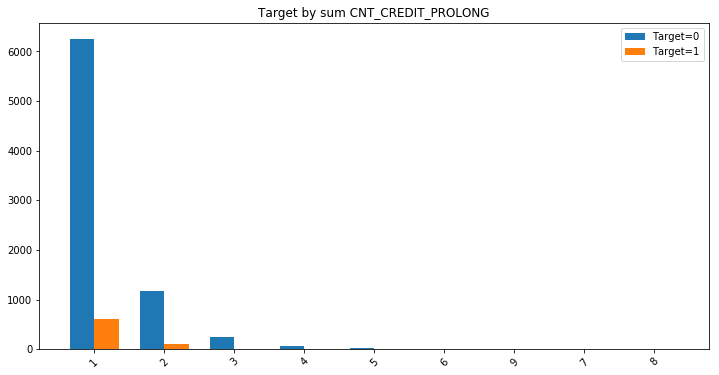

In [47]:
target_bar(sum_cnt_credit_prolong[sum_cnt_credit_prolong.CNT_CREDIT_PROLONG > 0], "CNT_CREDIT_PROLONG", "Target by sum CNT_CREDIT_PROLONG")

通算延長回数1のTarget=1割合が多いような気がする

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-credit-sum"></a>
## AMT_CREDIT_SUM

description : Current credit amount for the Credit Bureau credit

credit = 与信額 = 借りれる上限

その時点のクレジット額合計だから"SK_ID_CURR"でユニークではなく"SK_ID_BREAU"でユニーク

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


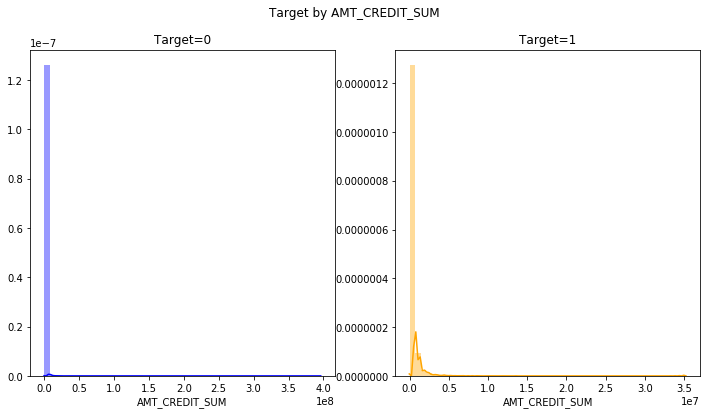

In [48]:
amt_credit_sum = bur[['SK_ID_CURR', 'AMT_CREDIT_SUM']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
target_hist(amt_credit_sum, "AMT_CREDIT_SUM", "Target by AMT_CREDIT_SUM")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


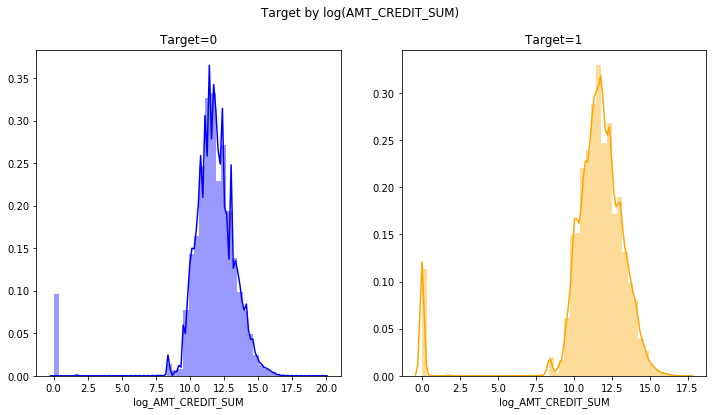

In [49]:
amt_credit_sum['log_AMT_CREDIT_SUM'] = np.log(amt_credit_sum.AMT_CREDIT_SUM + 1)
target_hist(amt_credit_sum, "log_AMT_CREDIT_SUM", "Target by log(AMT_CREDIT_SUM)")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


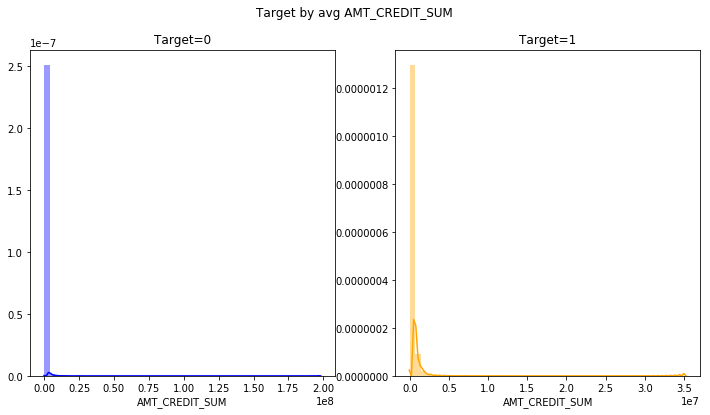

In [50]:
avg_amt_credit_sum = bur.groupby('SK_ID_CURR').AMT_CREDIT_SUM.mean().reset_index()
avg_amt_credit_sum = avg_amt_credit_sum.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
target_hist(avg_amt_credit_sum, "AMT_CREDIT_SUM", "Target by avg AMT_CREDIT_SUM")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


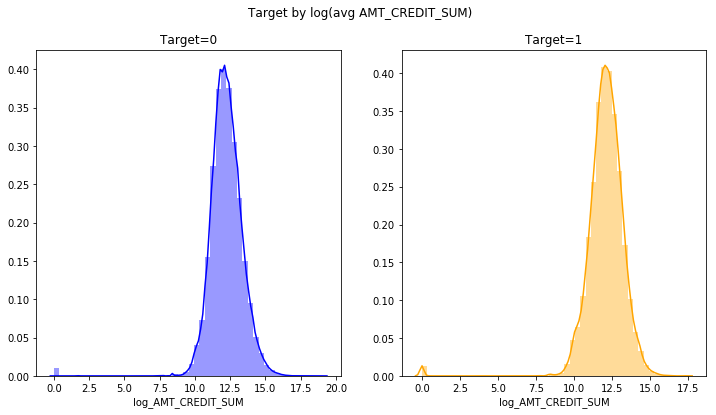

In [51]:
avg_amt_credit_sum['log_AMT_CREDIT_SUM'] = np.log(avg_amt_credit_sum.AMT_CREDIT_SUM + 1)
target_hist(avg_amt_credit_sum, "log_AMT_CREDIT_SUM", "Target by log(avg AMT_CREDIT_SUM)")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


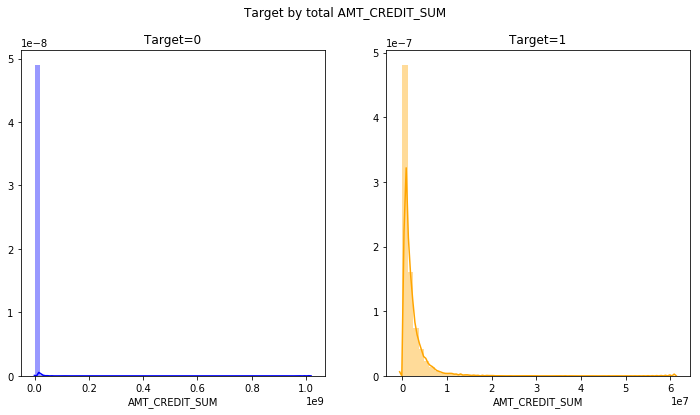

In [52]:
total_amt_credit_sum = bur.groupby('SK_ID_CURR').AMT_CREDIT_SUM.sum().reset_index()
total_amt_credit_sum = total_amt_credit_sum.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
target_hist(total_amt_credit_sum, "AMT_CREDIT_SUM", "Target by total AMT_CREDIT_SUM")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


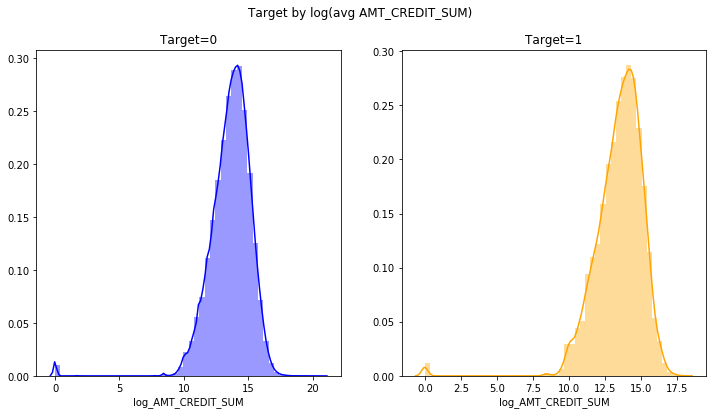

In [53]:
total_amt_credit_sum['log_AMT_CREDIT_SUM'] = np.log(total_amt_credit_sum.AMT_CREDIT_SUM + 1)
target_hist(total_amt_credit_sum, "log_AMT_CREDIT_SUM", "Target by log(avg AMT_CREDIT_SUM)")

合計値にしたほうが違いが出そう

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-credit-sum-debt"></a>
## AMT_CREDIT_SUM_DEBT

description : Current debt on Credit Bureau credit

debt = 債務 = 借入金総額

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


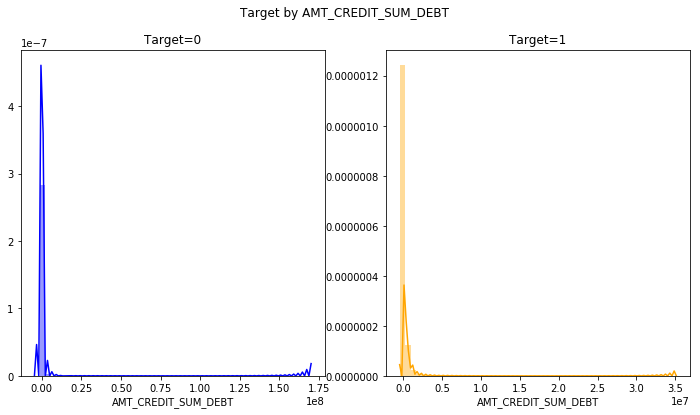

In [54]:
amt_credit_sum_debt = bur[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
target_hist(amt_credit_sum_debt, "AMT_CREDIT_SUM_DEBT", "Target by AMT_CREDIT_SUM_DEBT")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


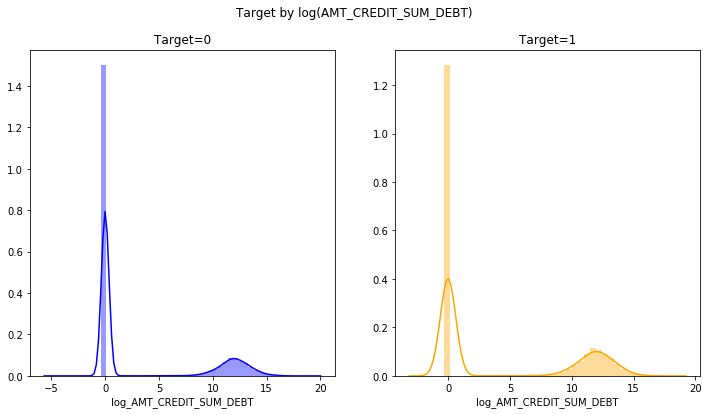

In [55]:
amt_credit_sum_debt['log_AMT_CREDIT_SUM_DEBT'] = np.log(amt_credit_sum_debt.AMT_CREDIT_SUM_DEBT + 1)
target_hist(amt_credit_sum_debt, "log_AMT_CREDIT_SUM_DEBT", "Target by log(AMT_CREDIT_SUM_DEBT)")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in log
c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


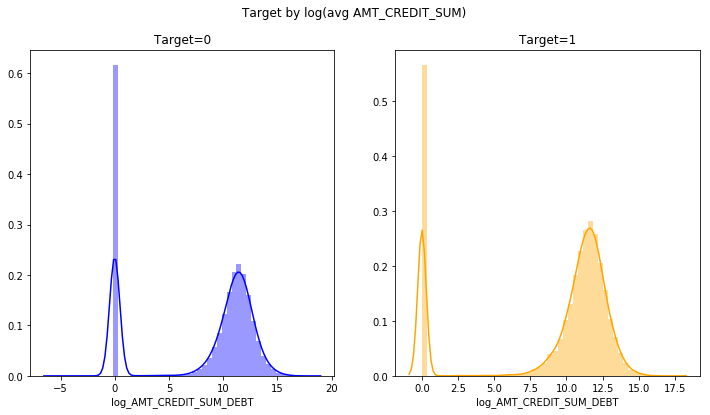

In [56]:
avg_amt_credit_sum_debt = bur.groupby('SK_ID_CURR').AMT_CREDIT_SUM_DEBT.mean().reset_index()
avg_amt_credit_sum_debt = avg_amt_credit_sum_debt.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
avg_amt_credit_sum_debt['log_AMT_CREDIT_SUM_DEBT'] = np.log(avg_amt_credit_sum_debt.AMT_CREDIT_SUM_DEBT + 1)
target_hist(avg_amt_credit_sum_debt, "log_AMT_CREDIT_SUM_DEBT", "Target by log(avg AMT_CREDIT_SUM)")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in log
c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


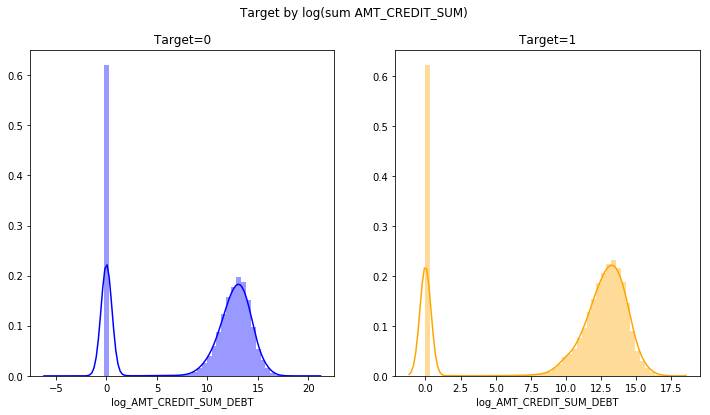

In [57]:
sum_amt_credit_sum_debt = bur.groupby('SK_ID_CURR').AMT_CREDIT_SUM_DEBT.sum().reset_index()
sum_amt_credit_sum_debt = sum_amt_credit_sum_debt.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
sum_amt_credit_sum_debt['log_AMT_CREDIT_SUM_DEBT'] = np.log(sum_amt_credit_sum_debt.AMT_CREDIT_SUM_DEBT + 1)
target_hist(sum_amt_credit_sum_debt, "log_AMT_CREDIT_SUM_DEBT", "Target by log(sum AMT_CREDIT_SUM)")

avgとsumにはあまり違い見られなかった

<a id="amt-credit-sum-limit"></a>
## AMT_CREDIT_SUM_LIMIT



description : Current credit limit of credit card reported in Credit Bureau

クレジットカードの上限額

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in log
c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


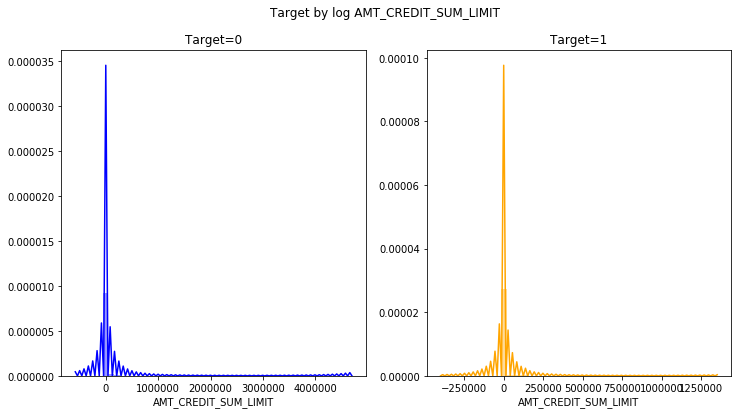

In [58]:
amt_credit_sum_limit = bur[['SK_ID_CURR', 'AMT_CREDIT_SUM_LIMIT']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
amt_credit_sum_limit['log_AMT_CREDIT_SUM_LIMIT'] = np.log(amt_credit_sum_limit.AMT_CREDIT_SUM_LIMIT + 1)
target_hist(amt_credit_sum_limit, "AMT_CREDIT_SUM_LIMIT", "Target by log AMT_CREDIT_SUM_LIMIT")

0ばっかだからカード持っていない人 or 情報がない人のほうが多いのでは？

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


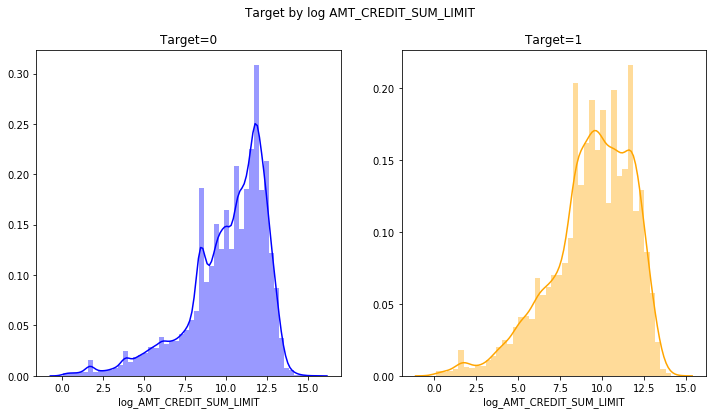

In [59]:
target_hist(amt_credit_sum_limit[amt_credit_sum_limit.AMT_CREDIT_SUM_LIMIT > 0], "log_AMT_CREDIT_SUM_LIMIT", "Target by log AMT_CREDIT_SUM_LIMIT")

0より大きい値で見てみたらまぁまぁ特徴あるっぽい

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in log
c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


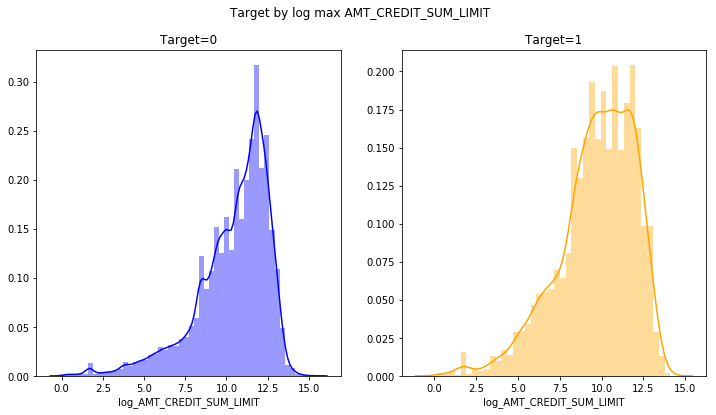

In [60]:
max_amt_credit_sum_limit = bur.groupby('SK_ID_CURR').AMT_CREDIT_SUM_LIMIT.max().reset_index()
max_amt_credit_sum_limit = max_amt_credit_sum_limit.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
max_amt_credit_sum_limit['log_AMT_CREDIT_SUM_LIMIT'] = np.log(1 + max_amt_credit_sum_limit.AMT_CREDIT_SUM_LIMIT)
target_hist(max_amt_credit_sum_limit[max_amt_credit_sum_limit.log_AMT_CREDIT_SUM_LIMIT > 0], 'log_AMT_CREDIT_SUM_LIMIT', 'Target by log max AMT_CREDIT_SUM_LIMIT')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-credit-sum-overdue"></a>
## AMT_CREDIT_SUM_OVERDUE

description : Current amount overdue on Credit Bureau credit

延滞額の総額

In [61]:
bur.AMT_CREDIT_SUM_OVERDUE.describe()

count    1.716428e+06
mean     3.791276e+01
std      5.937650e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.756681e+06
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


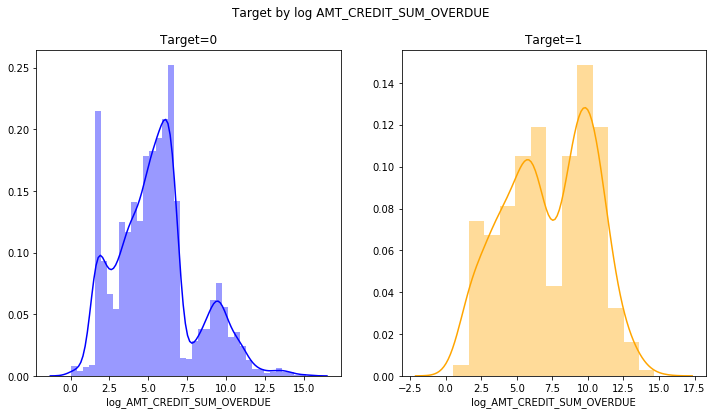

In [62]:
amt_credit_sum_overdue = bur[['SK_ID_CURR', 'AMT_CREDIT_SUM_OVERDUE']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
amt_credit_sum_overdue['log_AMT_CREDIT_SUM_OVERDUE'] = np.log(amt_credit_sum_overdue.AMT_CREDIT_SUM_OVERDUE + 1)
target_hist(amt_credit_sum_overdue[amt_credit_sum_overdue.AMT_CREDIT_SUM_OVERDUE > 0], "log_AMT_CREDIT_SUM_OVERDUE", "Target by log AMT_CREDIT_SUM_OVERDUE")

延滞してる人自体が少ない

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


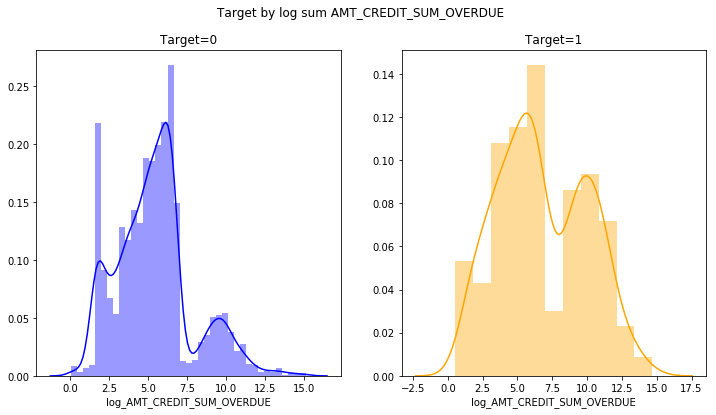

In [63]:
sum_amt_credit_sum_overdue = bur.groupby('SK_ID_CURR').AMT_CREDIT_SUM_OVERDUE.sum().reset_index()
sum_amt_credit_sum_overdue = sum_amt_credit_sum_overdue.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
sum_amt_credit_sum_overdue['log_AMT_CREDIT_SUM_OVERDUE'] = np.log(1 + sum_amt_credit_sum_overdue.AMT_CREDIT_SUM_OVERDUE)
target_hist(sum_amt_credit_sum_overdue[sum_amt_credit_sum_overdue.log_AMT_CREDIT_SUM_OVERDUE > 0], 'log_AMT_CREDIT_SUM_OVERDUE', 'Target by log sum AMT_CREDIT_SUM_OVERDUE')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="credit-type"></a>
## CREDIT_TYPE

description : Credit Type

In [64]:
bur.CREDIT_TYPE.value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

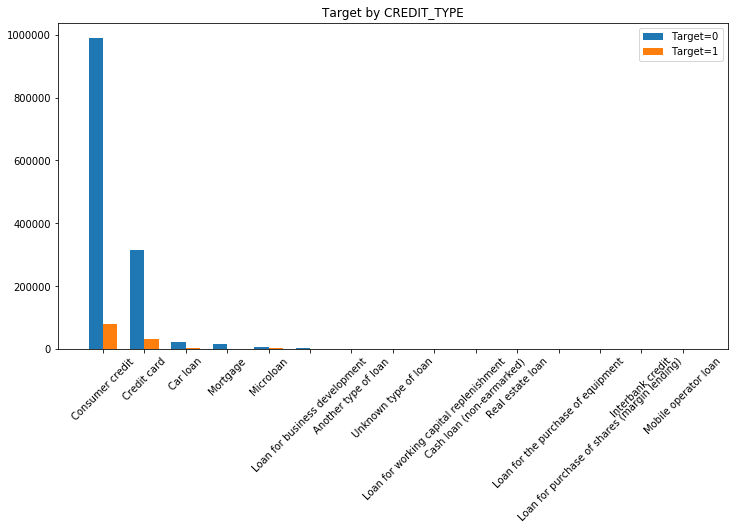

In [65]:
credit_type = bur[['SK_ID_CURR', 'CREDIT_TYPE']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
target_bar(credit_type, "CREDIT_TYPE", "Target by CREDIT_TYPE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="days-credit-update"></a>
## DAYS_CREDIT_UPDATE

description : How many days before loan application did last information about the Credit Bureau credit come

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


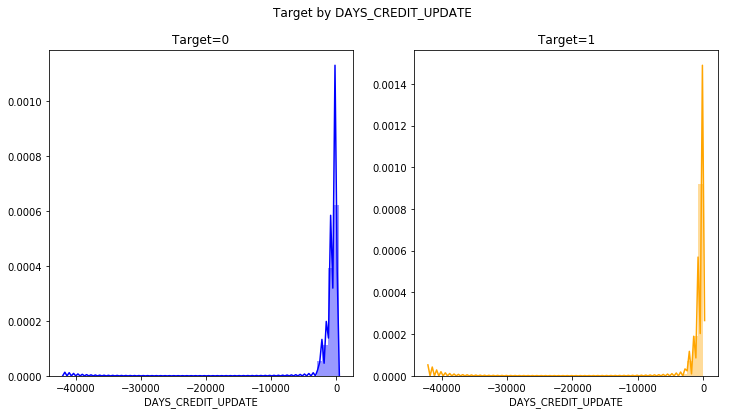

In [66]:
days_credit_update = bur[['SK_ID_CURR', 'DAYS_CREDIT_UPDATE']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
target_hist(days_credit_update, "DAYS_CREDIT_UPDATE", "Target by DAYS_CREDIT_UPDATE")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


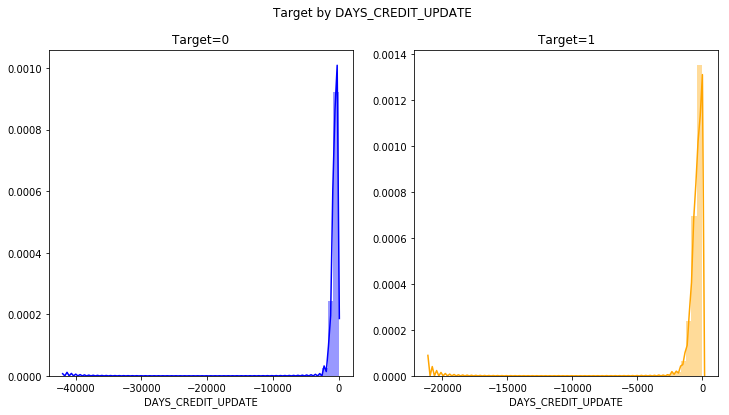

In [67]:
avg_days_credit_update = bur.groupby('SK_ID_CURR').DAYS_CREDIT_UPDATE.mean().reset_index()
avg_days_credit_update = avg_days_credit_update.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
target_hist(avg_days_credit_update, 'DAYS_CREDIT_UPDATE', 'Target by DAYS_CREDIT_UPDATE')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-annuity"></a>

## AMT_ANNUITY

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


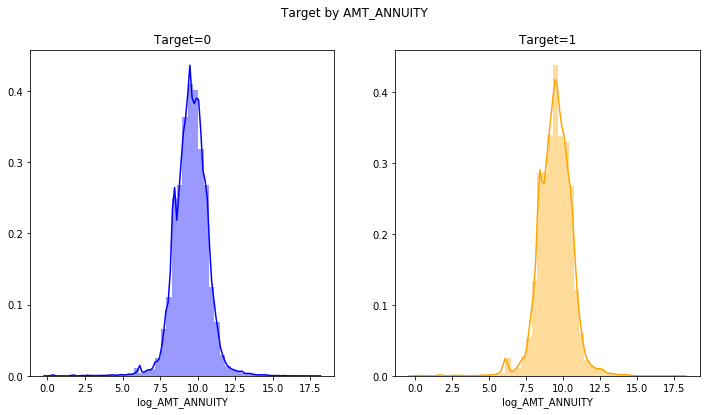

In [68]:
amt_annuity = bur[['SK_ID_CURR', 'AMT_ANNUITY']].merge(
    app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner'
)
amt_annuity['log_AMT_ANNUITY'] = np.log(amt_annuity.AMT_ANNUITY + 1)
target_hist(amt_annuity[amt_annuity.AMT_ANNUITY > 0], "log_AMT_ANNUITY", "Target by AMT_ANNUITY")

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


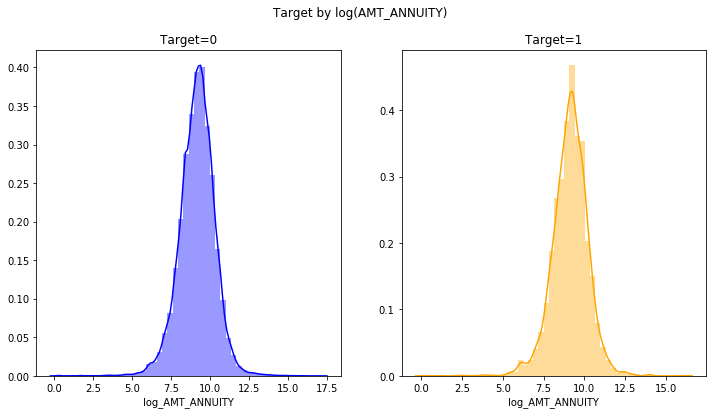

In [69]:
avg_amt_annuity = bur.groupby('SK_ID_CURR').AMT_ANNUITY.mean().reset_index()
avg_amt_annuity = avg_amt_annuity.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
avg_amt_annuity['log_AMT_ANNUITY'] = np.log(avg_amt_annuity.AMT_ANNUITY + 1)
target_hist(avg_amt_annuity[avg_amt_annuity.AMT_ANNUITY > 0], 'log_AMT_ANNUITY', 'Target by log(AMT_ANNUITY)')

c:\users\km65673\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


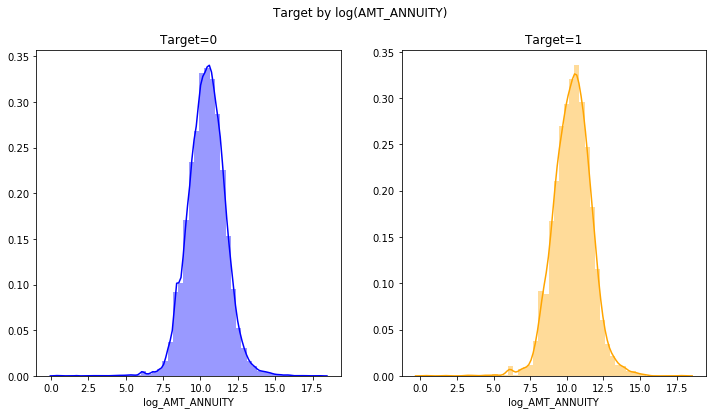

In [70]:
sum_amt_annuity = bur.groupby('SK_ID_CURR').AMT_ANNUITY.sum().reset_index()
sum_amt_annuity = sum_amt_annuity.merge(
    app_trn[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner'
)
sum_amt_annuity['log_AMT_ANNUITY'] = np.log(sum_amt_annuity.AMT_ANNUITY + 1)
target_hist(sum_amt_annuity[sum_amt_annuity.AMT_ANNUITY > 0], 'log_AMT_ANNUITY', 'Target by log(AMT_ANNUITY)')

<div style="text-align: right;">
[back to top](#top)
</div>